## Estatística 1

In [6]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#get current working directory
cwd = os.getcwd()
print(cwd)
df = pd.read_csv(cwd + '/World Energy Consumption.csv')


#remove NaN
df = df.dropna()

#remove duplicates
df = df.drop_duplicates()


/home/roratto/study/facul/DS_Unesp/Work_Git/Pedro_Roratto/WorkGit


In [9]:
#Identificar os países da América do Sul no df
paises_america_do_sul = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
df_SA = df[df['country'].isin(paises_america_do_sul)]


#print(df_SA)

#Exibir um resumo estatístico das variáveis relacionadas ao consumo de energia (como consumo de eletricidade, consumo de fontes renováveis, etc.).
print(df_SA.describe())

              year    population           gdp  biofuel_cons_change_pct  \
count    12.000000  1.200000e+01  1.200000e+01                12.000000   
mean   2014.500000  1.242926e+08  1.942209e+12                13.759250   
std       2.067058  8.535155e+07  1.160160e+12                13.112566   
min    2011.000000  4.152074e+07  8.259815e+11                -9.000000   
25%    2013.000000  4.271512e+07  8.340711e+11                 8.191000   
50%    2014.500000  1.226950e+08  1.868446e+12                15.233000   
75%    2016.000000  2.056061e+08  3.002278e+12                16.919750   
max    2018.000000  2.101666e+08  3.270706e+12                46.423000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count                12.000000                12.000000            12.000000   
mean                  8.443250               645.476333           108.861000   
std                  15.378394               373.140683           101.709448   
min 

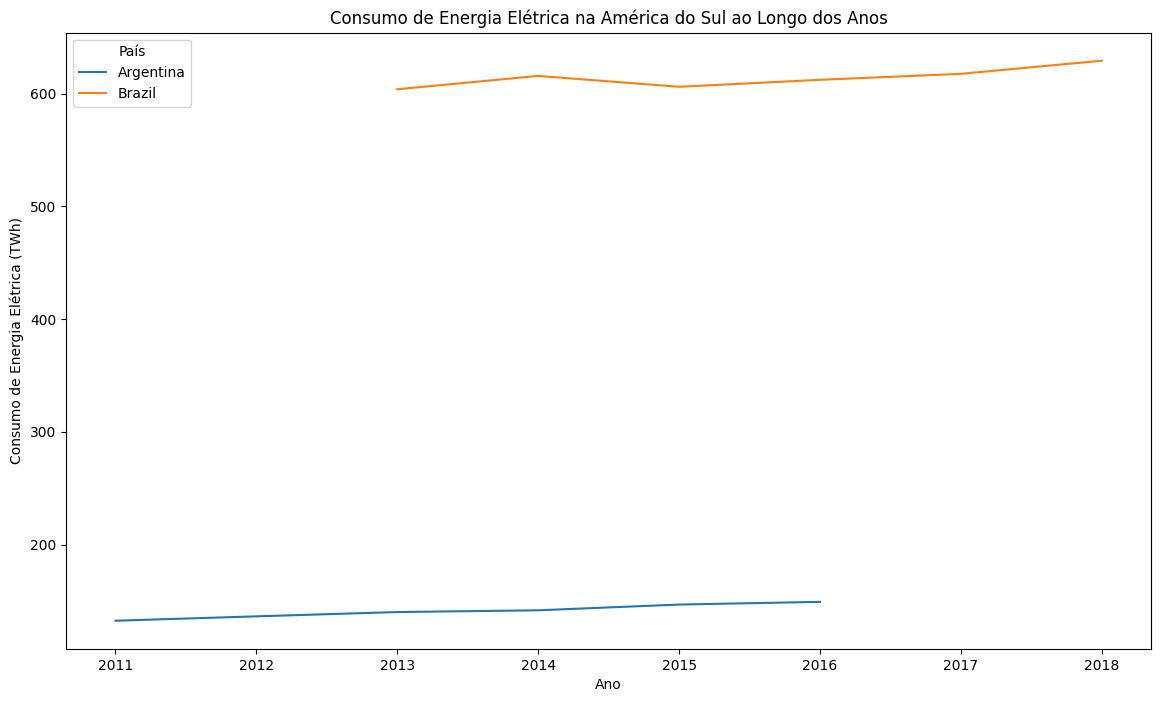

País com maior consumo total de energia elétrica: Brazil (3684.27 TWh)
País com menor consumo total de energia elétrica: Argentina (846.41 TWh)


In [10]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_SA, x='year', y='electricity_demand', hue='country')
plt.title('Consumo de Energia Elétrica na América do Sul ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Elétrica (TWh)')
plt.legend(title='País')
plt.show()

# Calcular o consumo total de energia elétrica para cada país
consumo_total = df_SA.groupby('country')['electricity_demand'].sum().reset_index()

# Identificar os países com maior e menor consumo total de energia elétrica
maior_consumo = consumo_total.loc[consumo_total['electricity_demand'].idxmax()]
menor_consumo = consumo_total.loc[consumo_total['electricity_demand'].idxmin()]

print(f"País com maior consumo total de energia elétrica: {maior_consumo['country']} ({maior_consumo['electricity_demand']} TWh)")
print(f"País com menor consumo total de energia elétrica: {menor_consumo['country']} ({menor_consumo['electricity_demand']} TWh)")


/tmp/ipykernel_51580/2061127995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA['renewable_energy'] = df_SA['hydro_consumption'] + df_SA['solar_consumption'] + df_SA['wind_consumption']
/tmp/ipykernel_51580/2061127995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA['non_renewable_energy'] = df_SA['fossil_fuel_consumption'] + df_SA['gas_consumption']


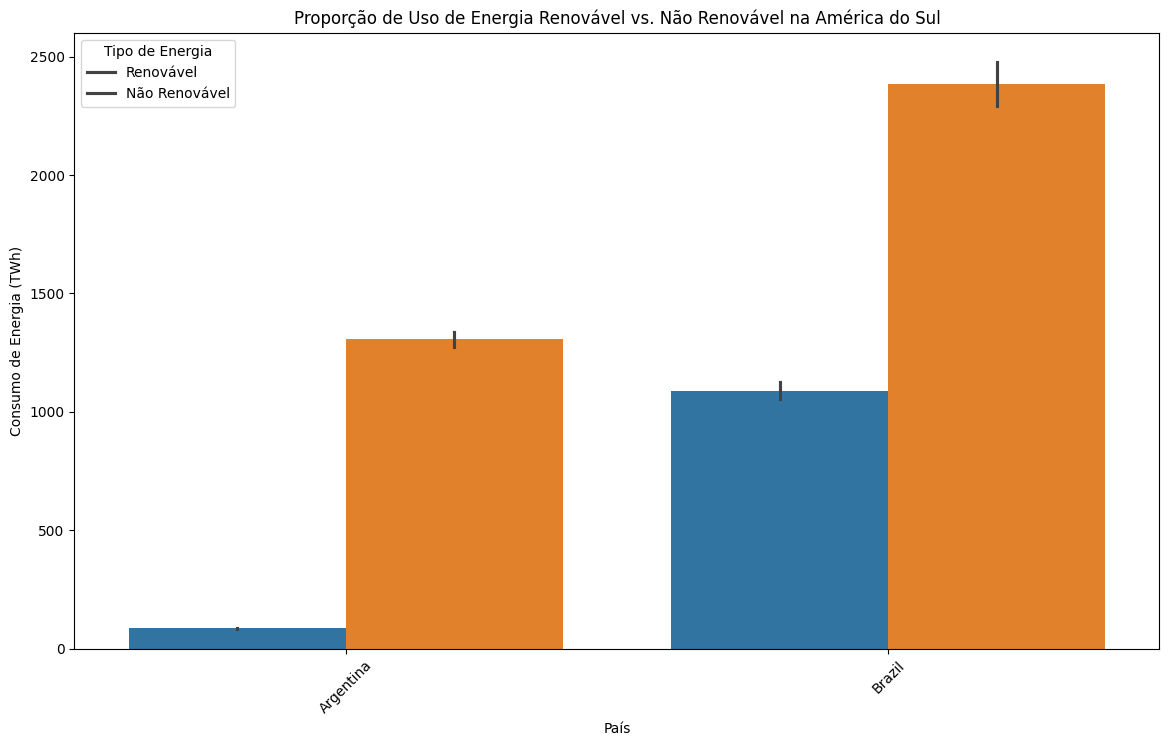

In [ ]:
df_SA['renewable_energy'] = df_SA['hydro_consumption'] + df_SA['solar_consumption'] + df_SA['wind_consumption']
df_SA['non_renewable_energy'] = df_SA['fossil_fuel_consumption'] + df_SA['gas_consumption']

stats = df_SA.groupby('country')[['renewable_energy', 'non_renewable_energy']].agg(['mean', 'std']).reset_index()

df_melted = df_SA.melt(id_vars='country', value_vars=['renewable_energy', 'non_renewable_energy'], var_name='energy_type', value_name='consumption')

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='country', y='consumption', hue='energy_type')
plt.title('Proporção de Uso de Energia Renovável vs. Não Renovável na América do Sul')
plt.xlabel('País')
plt.ylabel('Consumo de Energia (TWh)')
plt.legend(title='Tipo de Energia', labels=['Renovável', 'Não Renovável'])
plt.xticks(rotation=45)
plt.show()

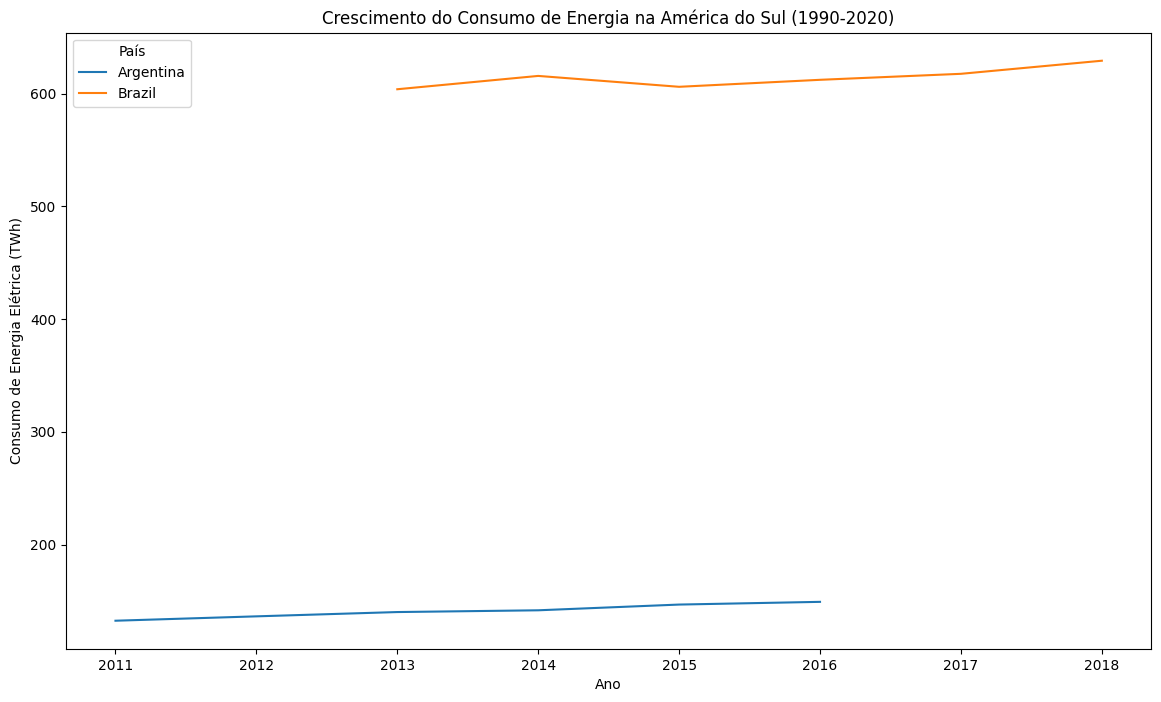

País com maior crescimento percentual no consumo de energia: Argentina (12.64%)
País com menor crescimento percentual no consumo de energia: Brazil (4.19%)


/tmp/ipykernel_51580/2054772927.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_total = df_SA.groupby('country').apply(calcular_crescimento_total).reset_index()


In [ ]:
df_SA = df_SA[(df_SA['year'] >= 1990) & (df_SA['year'] <= 2020)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_SA, x='year', y='electricity_demand', hue='country')
plt.title('Crescimento do Consumo de Energia na América do Sul (1990-2020)')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Elétrica (TWh)')
plt.legend(title='País')
plt.show()

df_SA['growth_rate'] = df_SA.groupby('country')['electricity_demand'].pct_change() * 100

def calcular_crescimento_total(grupo):
    primeiro_ano = grupo['year'].min()
    ultimo_ano = grupo['year'].max()
    consumo_inicial = grupo[grupo['year'] == primeiro_ano]['electricity_demand'].values[0]
    consumo_final = grupo[grupo['year'] == ultimo_ano]['electricity_demand'].values[0]
    crescimento_total = ((consumo_final - consumo_inicial) / consumo_inicial) * 100
    return crescimento_total

growth_total = df_SA.groupby('country').apply(calcular_crescimento_total).reset_index()
growth_total.columns = ['country', 'total_growth']

maior_crescimento = growth_total.loc[growth_total['total_growth'].idxmax()]
menor_crescimento = growth_total.loc[growth_total['total_growth'].idxmin()]

print(f"País com maior crescimento percentual no consumo de energia: {maior_crescimento['country']} ({maior_crescimento['total_growth']:.2f}%)")
print(f"País com menor crescimento percentual no consumo de energia: {menor_crescimento['country']} ({menor_crescimento['total_growth']:.2f}%)")

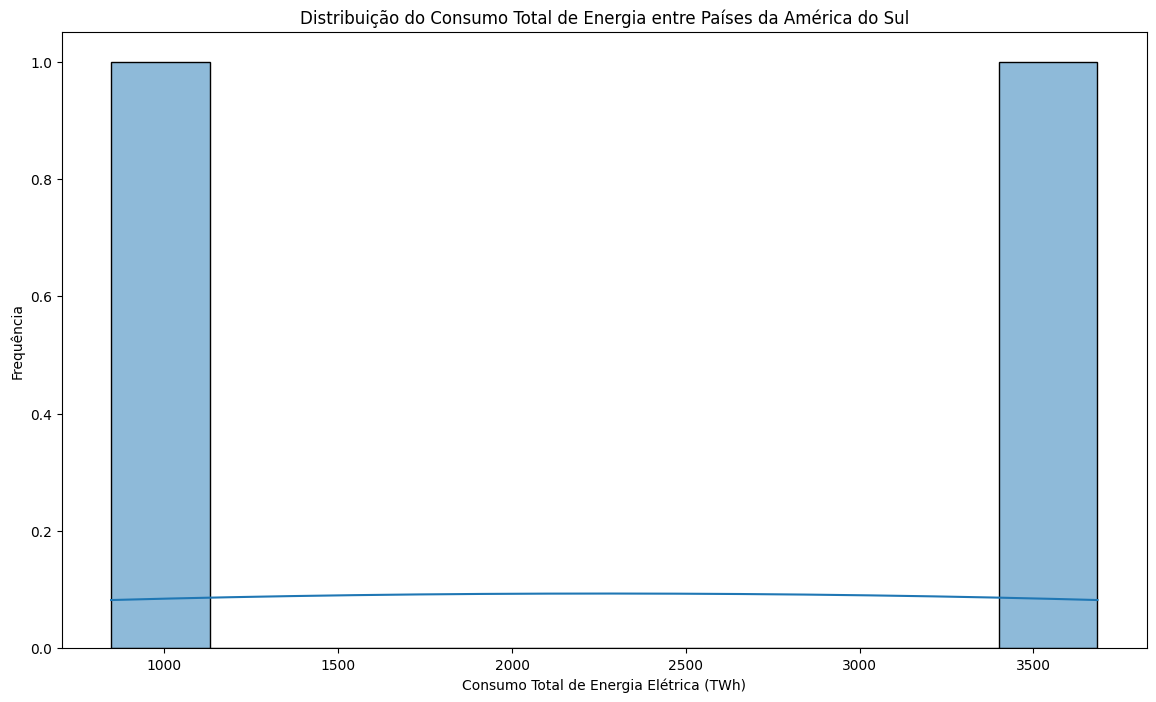

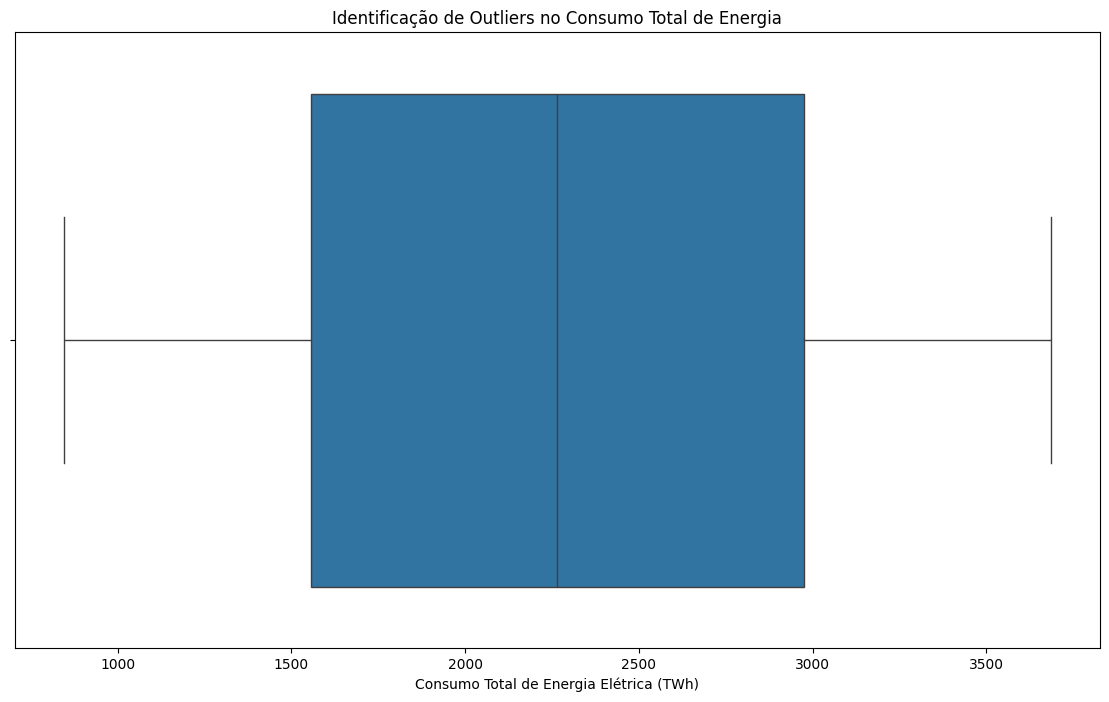

Países com consumo de energia considerado outlier:
Empty DataFrame
Columns: [country, electricity_demand]
Index: []


In [ ]:
consumo_total = df_SA.groupby('country')['electricity_demand'].sum().reset_index()

# Criar um histograma mostrando a distribuição do consumo total de energia entre os países da América do Sul
plt.figure(figsize=(14, 8))
sns.histplot(consumo_total['electricity_demand'], bins=10, kde=True)
plt.title('Distribuição do Consumo Total de Energia entre Países da América do Sul')
plt.xlabel('Consumo Total de Energia Elétrica (TWh)')
plt.ylabel('Frequência')
plt.show()

Q1 = consumo_total['electricity_demand'].quantile(0.25)
Q3 = consumo_total['electricity_demand'].quantile(0.75)
IQR = Q3 - Q1

outliers = consumo_total[(consumo_total['electricity_demand'] < (Q1 - 1.5 * IQR)) | (consumo_total['electricity_demand'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 8))
sns.boxplot(x='electricity_demand', data=consumo_total)
plt.title('Identificação de Outliers no Consumo Total de Energia')
plt.xlabel('Consumo Total de Energia Elétrica (TWh)')
plt.show()

print("Países com consumo de energia considerado outlier:")
print(outliers)

In [16]:
# Resumo das principais descobertas

maior_consumo = consumo_total.loc[consumo_total['electricity_demand'].idxmax()]

df_SA['renewable_energy'] = df_SA['hydro_consumption'] + df_SA['solar_consumption'] + df_SA['wind_consumption']
df_SA['non_renewable_energy'] = df_SA['fossil_fuel_consumption'] + df_SA['gas_consumption']

total_renewable_energy = df_SA['renewable_energy'].sum()
total_non_renewable_energy = df_SA['non_renewable_energy'].sum()
proporcao_renovavel = total_renewable_energy / (total_renewable_energy + total_non_renewable_energy) * 100

def calcular_crescimento_total(grupo):
    primeiro_ano = grupo['year'].min()
    ultimo_ano = grupo['year'].max()
    consumo_inicial = grupo[grupo['year'] == primeiro_ano]['electricity_demand'].values[0]
    consumo_final = grupo[grupo['year'] == ultimo_ano]['electricity_demand'].values[0]
    crescimento_total = ((consumo_final - consumo_inicial) / consumo_inicial) * 100
    return crescimento_total

growth_total = df_SA.groupby('country').apply(calcular_crescimento_total).reset_index()
growth_total.columns = ['country', 'total_growth']

maior_crescimento = growth_total.loc[growth_total['total_growth'].idxmax()]
menor_crescimento = growth_total.loc[growth_total['total_growth'].idxmin()]

# Exibir resumo das descobertas
print("Resumo das Principais Descobertas:")
print(f"País com maior consumo total de energia: {maior_consumo['country']} ({maior_consumo['electricity_demand']} TWh)")
print(f"Proporção de energia renovável usada na América do Sul: {proporcao_renovavel:.2f}%")
print(f"País com maior crescimento percentual no consumo de energia: {maior_crescimento['country']} ({maior_crescimento['total_growth']:.2f}%)")
print(f"País com menor crescimento percentual no consumo de energia: {menor_crescimento['country']} ({menor_crescimento['total_growth']:.2f}%)")

Resumo das Principais Descobertas:
País com maior consumo total de energia: Brazil (3684.27 TWh)
Proporção de energia renovável usada na América do Sul: 24.15%
País com maior crescimento percentual no consumo de energia: Argentina (12.64%)
País com menor crescimento percentual no consumo de energia: Brazil (4.19%)


/tmp/ipykernel_51580/3946266756.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_total = df_SA.groupby('country').apply(calcular_crescimento_total).reset_index()
